In [8]:
path = r"C:\Users\FM\Documents\Akseli\Code\MovFormer\result\Freddy_CV_20251016_151901\split_1\test_results_epoch100.npy"

import numpy as np

data = np.load(path, allow_pickle=True).item()

data["corrected"]

{'Acc': 93.39202360332325,
 'Edit': np.float64(86.47926133842694),
 'TP': 3795.0,
 'FP': 535.0,
 'FN': 242.0,
 'Frame_F1': 94.18176164845184,
 'F1@50': np.float64(83.27955061551333),
 'F1@75': np.float64(70.99318752240946),
 'F1@90': np.float64(56.31648141508306),
 'classwise_results': {1: {'f1s': array([100.        ,  95.65217391,  80.1242236 ]),
   'tp': array([161., 154., 129.]),
   'fp': array([ 0.,  7., 32.]),
   'fn': array([ 0.,  7., 32.])},
  2: {'f1s': array([98.46153846, 85.53846154, 74.46153846]),
   'tp': array([160., 139., 121.]),
   'fp': array([ 3., 24., 42.]),
   'fn': array([ 2., 23., 41.])},
  3: {'f1s': array([91.8699187 , 81.70731707, 66.66666667]),
   'tp': array([226., 201., 164.]),
   'fp': array([23., 48., 85.]),
   'fn': array([17., 42., 79.])},
  4: {'f1s': array([72.15189873, 59.49367089, 48.10126582]),
   'tp': array([57., 47., 38.]),
   'fp': array([16., 26., 35.]),
   'fn': array([28., 38., 47.])},
  5: {'f1s': array([89.01098901, 85.71428571, 67.03296703]

In [2]:
import cv2
import os

path = r"C:\Users\aksel\Desktop\20250309_01_Ivy\2025-03-09_009_Ivy-cam-1.mp4"


# Create ROI folder if it doesn't exist
roi_folder = "ROI"
os.makedirs(roi_folder, exist_ok=True)

# Open video file
cap = cv2.VideoCapture(path)
frame_idx = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    # Save every I-frame (keyframe)
    if int(cap.get(cv2.CAP_PROP_POS_FRAMES)) == int(cap.get(cv2.CAP_PROP_POS_FRAMES)):
        img_path = os.path.join(roi_folder, f"frame_{frame_idx:05d}.png")
        cv2.imwrite(img_path, frame)
    frame_idx += 1

cap.release()

In [12]:
weights.shape

(1, 1248)

In [ ]:
path = r"C:\Users\aksel\Desktop\Trial_data.nc"

import xarray as xr
from moveseg.utils.io import TrialTree
dt = TrialTree.load(path)
ds = dt.sel(trial=9)

In [ ]:
path = r"C:\Users\FM\Documents\Akseli\Code\MovFormer\result\Freddy_CV_20251029_162122\split_1\test_results_epoch40.npy"

import numpy as np

data = np.load(path, allow_pickle=True).item()
data

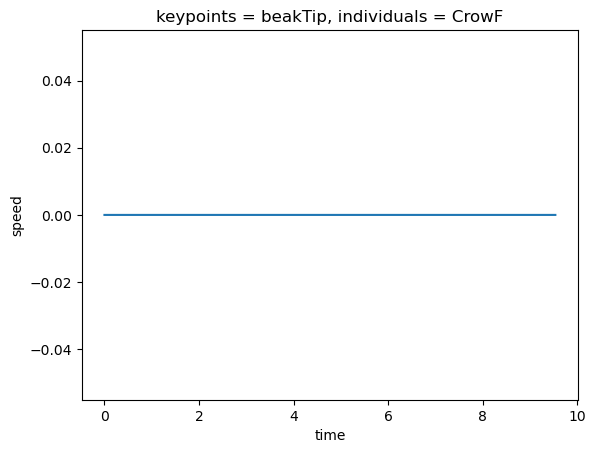

In [6]:
path = r"C:\Users\FM\Desktop\VideoDemo\Demo1\Trial_data_CrowF.nc"

from moveseg.utils.io import TrialTree


dt = TrialTree.load(path)
dt.isel(trials=0).speed.sel(keypoints="beakTip", individuals="CrowF").plot()

In [3]:
path = r"C:\Users\FM\Documents\Akseli\Code\MovFormer\result\Freddy_CV_20251029_162122\split_1\test_results_epoch40.npy"

import numpy as np
data = np.load(path, allow_pickle=True).item()
data

{'uncorrected': {'Acc': 94.01937083768735,
  'Edit': np.float64(72.62461614011268),
  'TP': 3811.0,
  'FP': 1719.0,
  'FN': 238.0,
  'Frame_F1': 93.88785543449374,
  'F1@50': np.float64(72.45015137279466),
  'F1@75': np.float64(59.4216515293872),
  'F1@90': np.float64(42.050318404843935),
  'classwise_results': {1: {'f1s': array([97.57575758, 91.51515152, 76.36363636]),
    'tp': array([161., 151., 126.]),
    'fp': array([ 8., 18., 43.]),
    'fn': array([ 0., 10., 35.])},
   2: {'f1s': array([88.20224719, 70.78651685, 58.98876404]),
    'tp': array([157., 126., 105.]),
    'fp': array([37., 68., 89.]),
    'fn': array([ 5., 36., 57.])},
   3: {'f1s': array([85.23364486, 76.63551402, 54.57943925]),
    'tp': array([228., 205., 146.]),
    'fp': array([ 64.,  87., 146.]),
    'fn': array([15., 38., 97.])},
   4: {'f1s': array([57.14285714, 42.85714286, 27.38095238]),
    'tp': array([48., 36., 23.]),
    'fp': array([35., 47., 60.]),
    'fn': array([37., 49., 62.])},
   5: {'f1s': arr

In [12]:
dt.to_netcdf(r"C:\Users\FM\Desktop\VideoDemo\Demo2\Trial_data_CrowF3.nc")

In [2]:
dt

NameError: name 'dt' is not defined

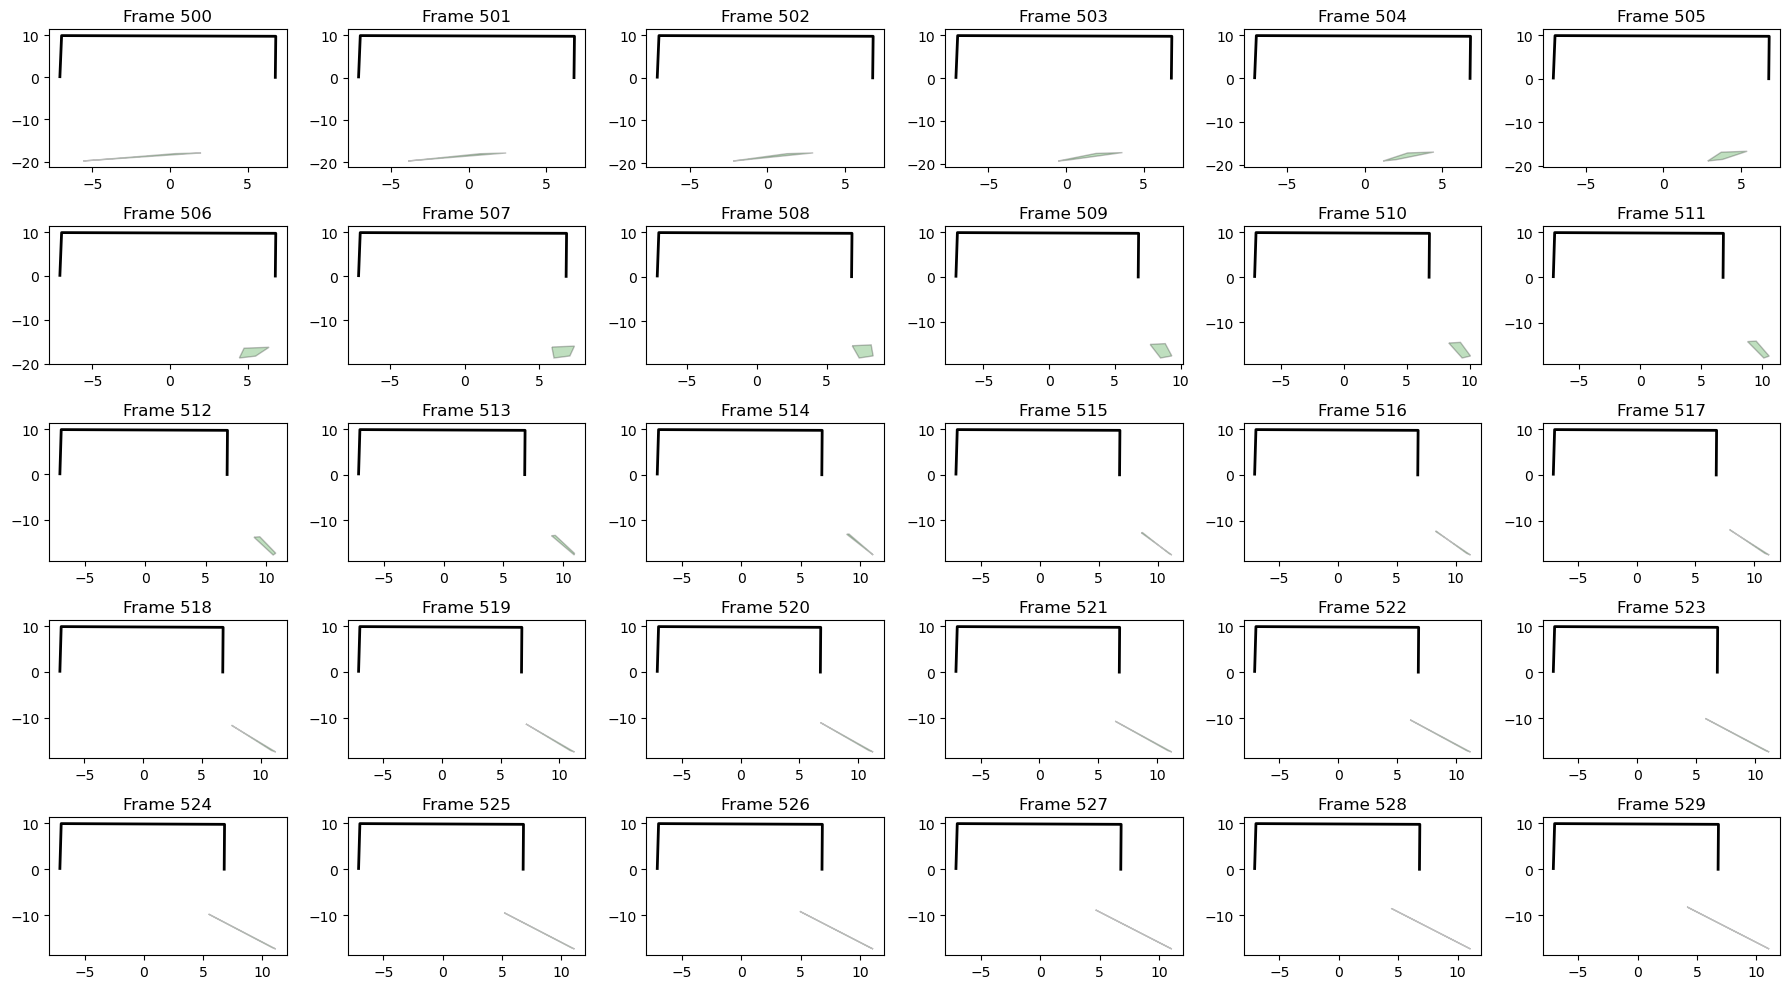

In [3]:
# pel_x = ds2.position.sel(keypoints="pellet", space=["x"]).squeeze().values
# pel_y = ds2.position.sel(keypoints="pellet", space=["y"]).squeeze().values

position = ds.position
displacements = ds.displacement
keypoint_names = ['stickTip', 'pellet']

n_frames = 30
fig, axes = plt.subplots(5, 6, figsize=(18, 10))
axes = axes.flatten()

for i, frame_idx in enumerate(range(500, 500 + n_frames)):
    # displacement_1 = max(displacements.sel(keypoints=keypoint_names[0], individuals="Ivy").values[frame_idx], 0.
    # displacement_2 = displacements.sel(keypoints=keypoint_names[1], individuals="Ivy").values[frame_idx]


    corn1 = position.sel(keypoints=keypoint_names[0], individuals="Ivy").values[frame_idx]
    corn4 = position.sel(keypoints=keypoint_names[1], individuals="Ivy").values[frame_idx]
    corn2 = position.sel(keypoints=keypoint_names[0], individuals="Ivy").values[frame_idx] + displacements.sel(keypoints=keypoint_names[1], individuals="Ivy").values[frame_idx]
    corn3 = position.sel(keypoints=keypoint_names[1], individuals="Ivy").values[frame_idx] + displacements.sel(keypoints=keypoint_names[0], individuals="Ivy").values[frame_idx]

    if np.isnan(corn1).any() or np.isnan(corn2).any() or np.isnan(corn3).any() or np.isnan(corn4).any():
        axes[i].axis('off')
        continue

    corners = tuple((int(c[0]), int(c[1])) for c in [corn1, corn2, corn3, corn4])
    region = PolygonOfInterest([corn1, corn2, corn3, corn4])



    ax = axes[i]
    # ax.set_ylim(-10, -1)
    # ax.set_xlim(-5, 5)
    box_xy = np.array([[-7.09,  0.14],
                        [-6.98,  9.88],
                        [ 6.81,  9.72],
                        [ 6.78, -0.02]])
    ax.plot(box_xy[:, 0], box_xy[:, 1], 'k-', linewidth=2)

    region.plot(ax=ax, facecolor="green", alpha=0.25)
    ax.set_title(f"Frame {frame_idx}")
    # ax.set_xticks([])
    # ax.set_yticks([])



plt.tight_layout()
plt.show()

In [ ]:

    # for i in range(2):
    #     if i == 0:
    #         pos = position
    #     else:
    #         pos = pos_forward

    #     color = color_map[(keypoint, i)]
    
    #     # plot position data for each keypoint
    #     sc = ax.scatter(
    #         pos.sel(space="x", **kwargs),
    #         pos.sel(space="y", **kwargs),
    #         s=5,
    #         c=color,
    #         label=keypoint,
    #         alpha=0.2
    #     )
        
    #     # plot displacement vectors: at t, vector from t-1 to t
    #     ax.quiver(
    #         position.sel(space="x", **kwargs),
    #         position.sel(space="y", **kwargs),
    #         displacement.sel(space="x", **kwargs),
    #         displacement.sel(space="y", **kwargs),
    #         angles="xy",
    #         scale=1,
    #         scale_units="xy",
    #         headwidth=7,
    #         headlength=9,
    #         headaxislength=9,
    #         color=color
    #     )

In [3]:
img_path = r"C:\Users\aksel\Documents\Code\movformer\movformer\thesis_figures\ROI\frame_00512.png"

x = [317, 342, 340, 311]
y = [19, 19, 48, 50]
nest_corners = tuple((xi, yi) for xi, yi in zip(x, y))
region = PolygonOfInterest(nest_corners, name="area")

habitat_fig, habitat_ax = plt.subplots(1, 1, figsize=(20, 10))
habitat_ax.imshow(plt.imread(img_path))
region.plot(habitat_ax, facecolor="green", alpha=0.25)
habitat_ax.set_xlabel("x (pixels)")
habitat_ax.set_ylabel("y (pixels)")

habitat_fig.show()





individual_was_inside = region.contains_point(positions)





NameError: name 'PolygonOfInterest' is not defined

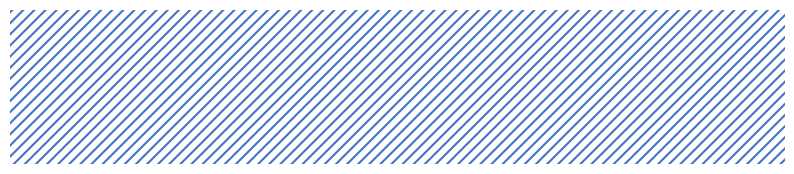

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from typing import Tuple


def create_hatched_pattern(
    figsize: Tuple[float, float] = (10, 2),
    hatch_pattern: str = '///',
    facecolor: str = 'white',
    edgecolor: str = '#4472C4',
    linewidth: float = 1.5,
    output_file: str = 'hatched_pattern.png'
) -> None:
    fig, ax = plt.subplots(figsize=figsize)
    
    rectangle = patches.Rectangle(
        (0, 0), 1, 1,
        linewidth=0,
        edgecolor=edgecolor,
        facecolor=facecolor,
        hatch=hatch_pattern
    )
    
    ax.add_patch(rectangle)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    
    plt.rcParams['hatch.linewidth'] = linewidth
    plt.rcParams['hatch.color'] = edgecolor
    
    plt.savefig(
        output_file,
        format='pdf',
        bbox_inches='tight',
        pad_inches=0,
        dpi=300
    )
    plt.show()

if __name__ == '__main__':
    create_hatched_pattern()

In [ ]:
plt.shop